# Exercise 3 - Segmentation

### Packages and functions
We are going to need a lot of Python **packages**, so let's start by importing all of them.

In [3]:
#Import the libraries we will be using

import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt

%matplotlib inline

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In this exercise, we will continue working with the Titanic data set

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/AUP-CS2091/Week-2/master/titanic-data.csv')


Let's start by trying to make some sense out of the data. We can try to plot different features and see if they give us information about the survival of passengers.
We can obtain specific features (columns) by using the following syntax

In [5]:
# Our feature
X = df['Age']

# Our target
Y = df['Survived']

And plot

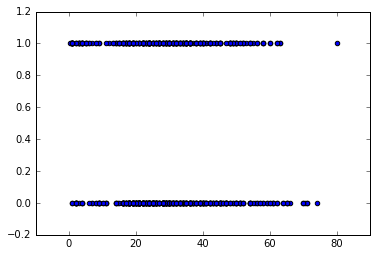

In [6]:
plt.scatter(X, Y)

Unfortunately, the data is mixed between the two target categories (survived and did not survived).
We can try to improve the coloring and data in order to get more information but we can also use the **seaborn** package.

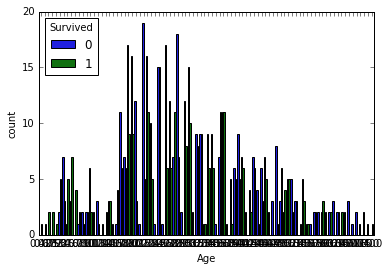

In [7]:
import seaborn as sns
sns.countplot(x="Age", hue="Survived", data=df)

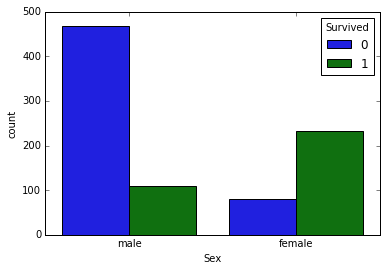

In [8]:
sns.countplot(x="Sex", hue="Survived", data=df)

We can also use seaborn for getting insight about the relationship between two different features and survival.

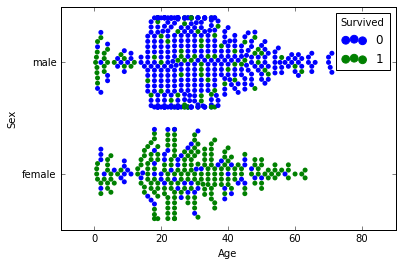

In [9]:
sns.swarmplot(x="Age", y="Sex", hue="Survived", data=df)

You can read more about all possible plots for categorical data here http://seaborn.pydata.org/tutorial/categorical.html 

**Question 1:** Can you tell what are the points on the left of the Age 0? Yes. they are people who didn't survive.

Can we say that being a female is a good point to differentiate survival? Let's quantify it.

**Entropy** ($H$) and **information gain** ($IG$) are crucial in determining which features are the most informative. 

Given the data, it is fairly straight forward to calculate both of these.

<table style="border: 0px">
<tr style="border: 0px">
<td style="border: 0px"><img src="https://raw.githubusercontent.com/AUP-CS2091/Week-3/master/images/dsfb_0304.png?token=AFj8VVE3cOv6y2vlBLCX14Il3tqGYcjXks5ZzM8jwA%3D%3D" height=80% width=80%>
Figure 3-4. Splitting the "write-off" sample into two segments, based on splitting the Balance attribute (account balance) at 50K.</td>
</tr>
</table>

Remember, **entropy** is the amount of chaos of a target variables for a specific feature.
For being able to compute it, we need to be able to get the frequency of each category within the feature.

In [10]:
# data is going to contain the modified data which contain numerical values
data = df
data['Sex'] = df['Sex'].astype('category').cat.codes

# Age sometimes contains nan (not a number) or -1 values, lets replace them by 0s
data['Age'] = data['Age'].map(lambda x: 0 if math.isnan(x) or x == -1 else x)

In [11]:
# Measuring frequency of each category or value
counts = np.bincount(df['Age'].astype(int)).astype(float)
counts

array([ 184.,    7.,   10.,    6.,   10.,    4.,    3.,    3.,    4.,
          8.,    2.,    4.,    1.,    2.,    7.,    5.,   17.,   13.,
         26.,   25.,   16.,   24.,   27.,   16.,   31.,   23.,   18.,
         18.,   27.,   20.,   27.,   17.,   20.,   15.,   16.,   18.,
         23.,    6.,   11.,   14.,   15.,    6.,   13.,    5.,    9.,
         14.,    3.,    9.,    9.,    6.,   10.,    7.,    6.,    1.,
          8.,    3.,    4.,    2.,    5.,    2.,    4.,    3.,    4.,
          2.,    2.,    3.,    1.,    0.,    0.,    0.,    3.,    2.,
          0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    1.])

Can we also do that for the **Sex** feature? Try!

In [12]:
# Measuring frequency of each category or value
counts = np.bincount(df['Sex'].astype(int)).astype(float)
counts

array([ 314.,  577.])

Many library functions for Data Science in Python need numerical data. We can use built-in functions for converting categorical values into numerical ones.

We can try to count categories for **sex** now!

In [25]:
counts = data['Sex'].astype('category').cat.codes
counts_cat


0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
dtype: int8

We also need a way to get the total number of elements and a way to compute logarithms.

In [33]:
# number of all elements in a feature
n = len(data['Sex'])

# the binary logarithm of the probablilty to be a female
math.log(counts[0]/n, 2)

-9.799281621521923

**Question 2:** Please compute the entropy of the Sex feature

In [35]:
import scipy as sc

def ent(data):
    prob = math.log(counts[0]/n, 2)
    entropy=sc.stats.entropy(prob)
    return entropy

ent(data)

0.0

**Question 3:** Can you create a general function which computes the entropy of an arbitrary numerical feature?

In [29]:
def entropy(target):
    # Get the number of instances
    n = len(target)
    
    # Count how frequently each unique target value occurs using the numpy function 
    counts = np.bincount(target).astype(float)
    
    # Initialize entropy
    entropy = 0
    
    # Otherwise, for each possible value, update entropy; use zero for 0 log 0
    for count in counts:
        if (count > 0):
            entropy += (count/n) * math.log(count/n,2)
        
    # Return entropy
    return -1 * entropy

**Question 4:** What is the entropy of the feature Pclass?

In [36]:
entropy(data['Pclass'])

1.4393214704441286

We can now use entropy in order to compute the **Information Gain (IG)** of splitting the data over a certain feature and a certain threshold!
But first, lets see how to split a feature using a treshold.

In [38]:
splitted_feature = (data['Age'] < 20)

**Question 5:** What is contained in splitted_feature?

In [40]:
# We can select the survival of each split
left_class = data['Survived'][splitted_feature == False]

# And we can count them
left_class.count()

550

**Question 6:** Can you complete the function below?

In [60]:
def information_gain(feature, threshold, target):
    # Dealing with numpy arrays makes this slightly easier
    target = np.array(target)
    feature = np.array(feature)
    # Cut the feature vector on the threshold
    feature = (feature < threshold)
    # Initialize information gain with the parent entropy
    entropy_parent = entropy(target)
    
    # For both sides of the threshold, update information gain
    # probability of being on the left
    prob_left = len(feature[feature == False]) / len(feature)
    # probability of being on the right
    prob_right = len(feature[feature == True]) / len(feature)  
    
    ig = entropy_parent - prob_left * entropy(target[feature == False]) - prob_right * entropy(target[feature == True])

    return ig

In [62]:
threshold = 25
IG = information_gain(data['Sex'], threshold, np.array(data['Survived']))

IG

0.0

We can now go ahead and search for the best threshold

**Question 7 (bonus):** Can you implement a function which selects the best threshold for a given feature and target?

In [42]:
def best_threshold(feature,target):
    maximum_ig = 0
    maximum_threshold = 0

    for threshold in feature:
        ig = information_gain(feature, threshold, target)
        if (ig > maximum_threshold):
            maximum_ig = ig
            maximum_threshold = threshold
            
    return "The maximum IG = " + str(maximum_ig) + " and it occured by splitting on " + str(maximum_threshold)


In [53]:
best_threshold(data['Pclass'], data['Survived'])

'The maximum IG = 0.0757936274361 and it occured by splitting on 3'